In [3]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv('airfoil_self_noise.dat',sep='\t')

In [7]:
df.head()

,800,0,0.3048,71.3,0.00266337,126.201
0,1000,0.0,0.3048,71.3,0.002663,125.201
1,1250,0.0,0.3048,71.3,0.002663,125.951
2,1600,0.0,0.3048,71.3,0.002663,127.591
3,2000,0.0,0.3048,71.3,0.002663,127.461
4,2500,0.0,0.3048,71.3,0.002663,125.571


In [8]:
df=pd.read_csv('airfoil_self_noise.dat',sep='\t',header=None)

In [10]:
df.head()

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [11]:
columnas = ['freq','angle','chord','velocity','suction','sound']

In [12]:
df.columns=columnas

In [13]:
df.head()

,freq,angle,chord,velocity,suction,sound
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


# Separate X (features) and Y (result)

In [16]:
X = df.iloc[:,:5]
y = df.iloc[:,5]

In [17]:
X.head()

,freq,angle,chord,velocity,suction
0,800,0.0,0.3048,71.3,0.002663
1,1000,0.0,0.3048,71.3,0.002663
2,1250,0.0,0.3048,71.3,0.002663
3,1600,0.0,0.3048,71.3,0.002663
4,2000,0.0,0.3048,71.3,0.002663


In [19]:
y.head()

0    126.201
1    125.201
2    125.951
3    127.591
4    127.461
Name: sound, dtype: float64

# Graphing

In [21]:
import matplotlib.pyplot as plt

In [22]:
X.shape

(1503, 5)

In [25]:
eje_x=list(range(X.shape[0]))
eje_y=y

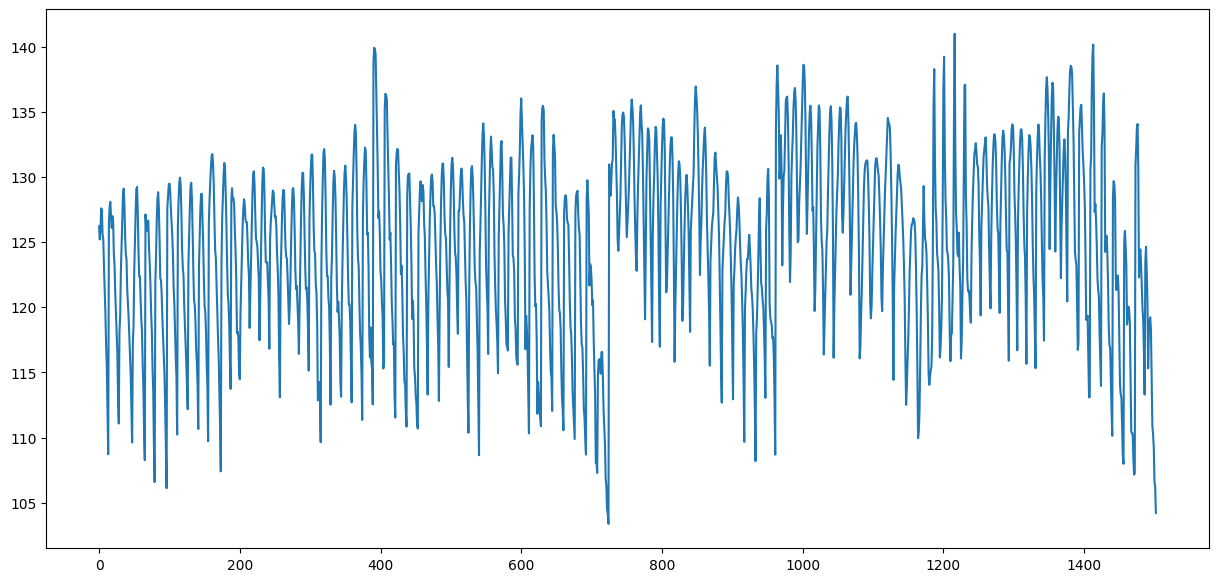

In [30]:
fig, ax=plt.subplots()
ax.plot(eje_x,eje_y,'-')
fig.set_size_inches(15,7)
plt.show()

In [32]:
import seaborn as sns

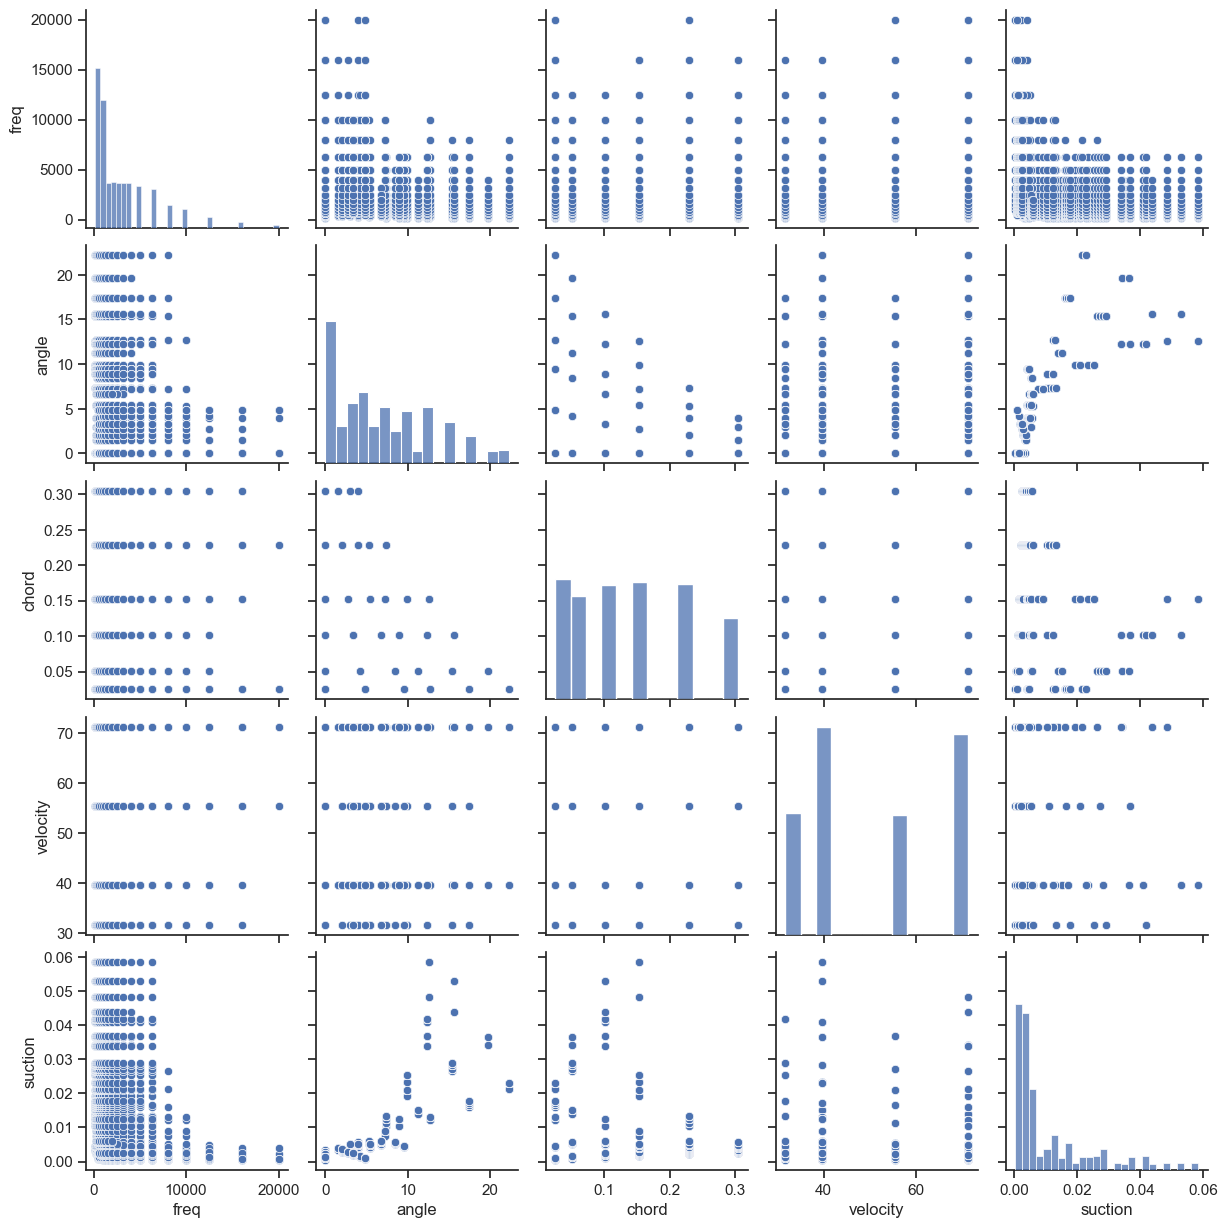

In [33]:
sns.set(style='ticks')
sns.pairplot(X)

<AxesSubplot: xlabel='chord', ylabel='angle'>

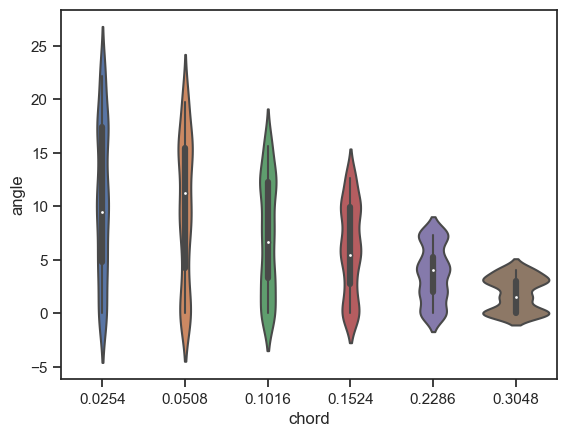

In [37]:
sns.violinplot(x='chord', y='angle', data=X)

In [41]:
from sklearn.model_selection import train_test_split

# Training

**train and test dataset**

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [46]:
X_train.shape, X.shape

((1052, 5), (1503, 5))

**linear regression model**

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
model = LinearRegression()

model

**fit for regression**

In [50]:
model.fit(X_train, y_train)

LinearRegression()

**predicts**

In [51]:
y_preds = model.predict(X_test)

In [52]:
y_preds

array([119.67538751, 119.81150781, 125.9967535 , 126.01349344,
       130.68978942, 124.01104362, 129.96645572, 127.96287322,
       127.59099693, 125.13472564, 121.17488679, 121.90875174,
       121.67347252, 125.87156542, 114.69637968, 123.97915082,
       120.22699558, 122.04214147, 133.0840635 , 123.97724937,
       127.28157163, 120.26436048, 118.43152819, 131.7998307 ,
       125.55084725, 130.28455639, 134.07912881, 123.004296  ,
       126.87550534, 124.76150324, 125.52297865, 124.57582958,
       126.82346806, 129.95977781, 126.94273101, 130.80032297,
       123.79661087, 123.9312318 , 123.94566592, 132.97415581,
       122.36285965, 127.59943056, 122.37437276, 125.7142919 ,
       124.57949336, 121.12943119, 124.35689865, 124.13048792,
       119.97097543, 125.00798544, 122.86361105, 131.41269848,
       129.1941146 , 130.55249902, 125.73161029, 126.13085938,
       130.20453249, 128.60738348, 117.49874226, 130.0300642 ,
       132.98120655, 119.71262273, 127.55238071, 120.93

**compare real vs predict**

In [53]:
comp = pd.DataFrame({'real':y_test,'pred':y_preds})

In [54]:
comp.head()

,real,pred
91,117.741,119.675388
75,118.122,119.811508
1213,120.657,125.996754
330,122.229,126.013493
1352,129.343,130.689789


In [55]:
from sklearn.metrics import mean_squared_error

In [56]:
MSE = mean_squared_error(y_test, y_preds)

In [57]:
MSE

24.782847491064654

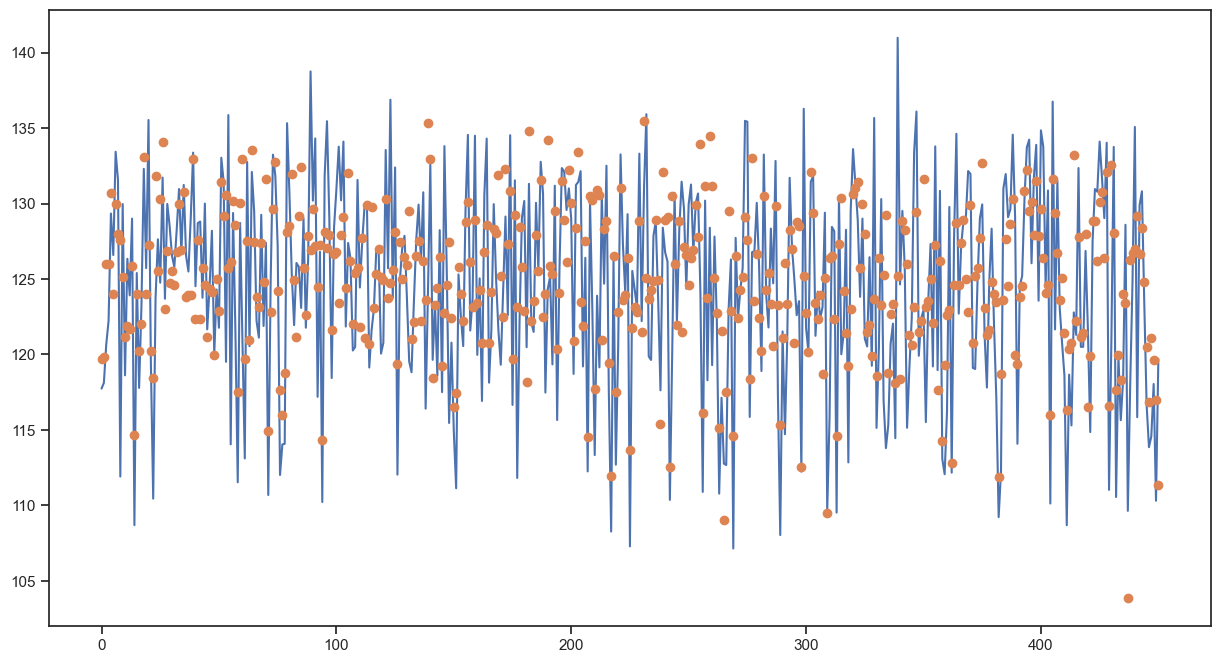

In [59]:
eje_x=list(range(X_test.shape[0]))
eje_y = y_test
eje_y2 = y_preds

fig, ax = plt.subplots()
ax.plot(eje_x, eje_y,'-',eje_x,eje_y2,'o')
fig.set_size_inches(15,8)

In [62]:
def plot_20(y_ver, y_pred):
    eje_x=list(range(20))
    eje_y = y_ver[:20]
    eje_y2 = y_pred[:20]

    fig, ax = plt.subplots()
    ax.plot(eje_x, eje_y,'-',eje_x,eje_y2,'o')
    fig.set_size_inches(15,8)

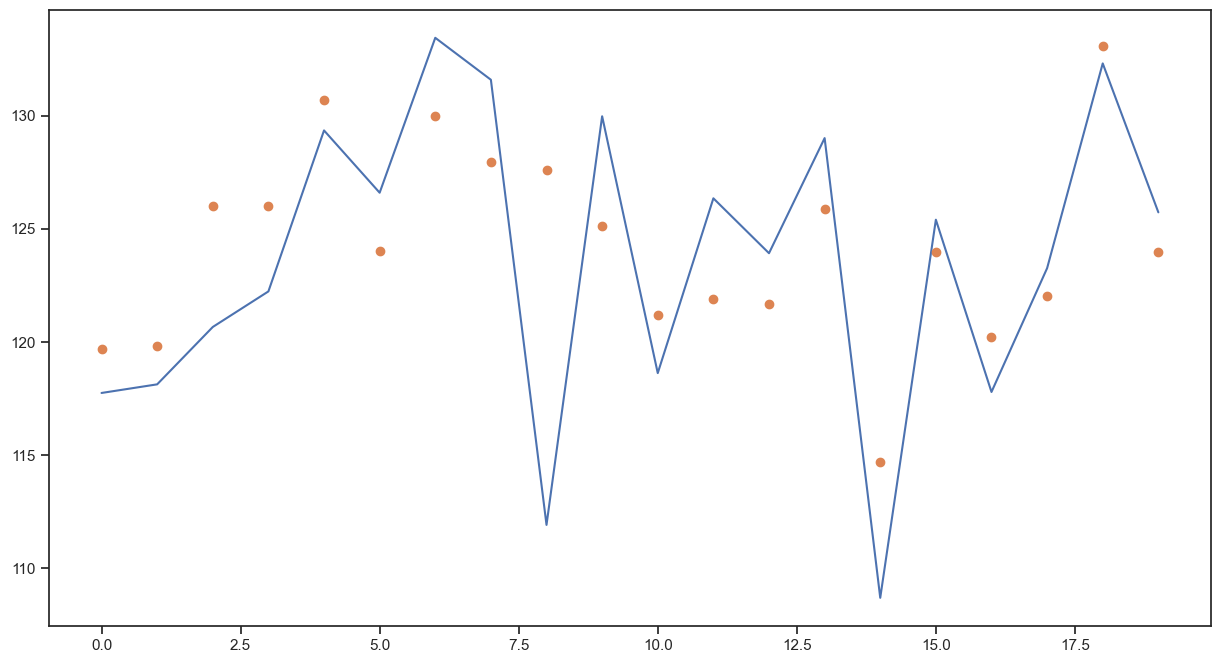

In [63]:
plot_20(y_test,y_preds)

**other regression models: Ridge**

In [64]:
from sklearn.linear_model import Ridge

In [69]:
ridge = Ridge(alpha=0.1)

In [70]:
ridge.fit(X_train, y_train)
y_preds = ridge.predict(X_test)
print(mean_squared_error(y_test, y_preds))

24.803289065410862


**alfa options for optimal value evaluation**

In [71]:
alphas = np.arange(0.01, 0.1, 0.001)

In [73]:
mse = list()
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_preds = ridge.predict(X_test)
    error = round(mean_squared_error(y_test, y_preds),3)
    mse.append(error)

alpha_error = pd.DataFrame({'mse': mse, 'alpha': alphas})

In [75]:
alpha_error.head()

,mse,alpha
0,24.693,0.010
1,24.687,0.011
2,24.682,0.012
3,24.678,0.013
4,24.674,0.014


**find the best mse**

In [76]:
alpha_error[alpha_error['mse'] == alpha_error['mse'].min()]

,mse,alpha
18,24.65,0.028


In [92]:
ridge = Ridge(alpha=0.028)
ridge.fit(X_train, y_train)
y_preds = ridge.predict(X_test)
print(mean_squared_error(y_test, y_preds))

24.650464247916062


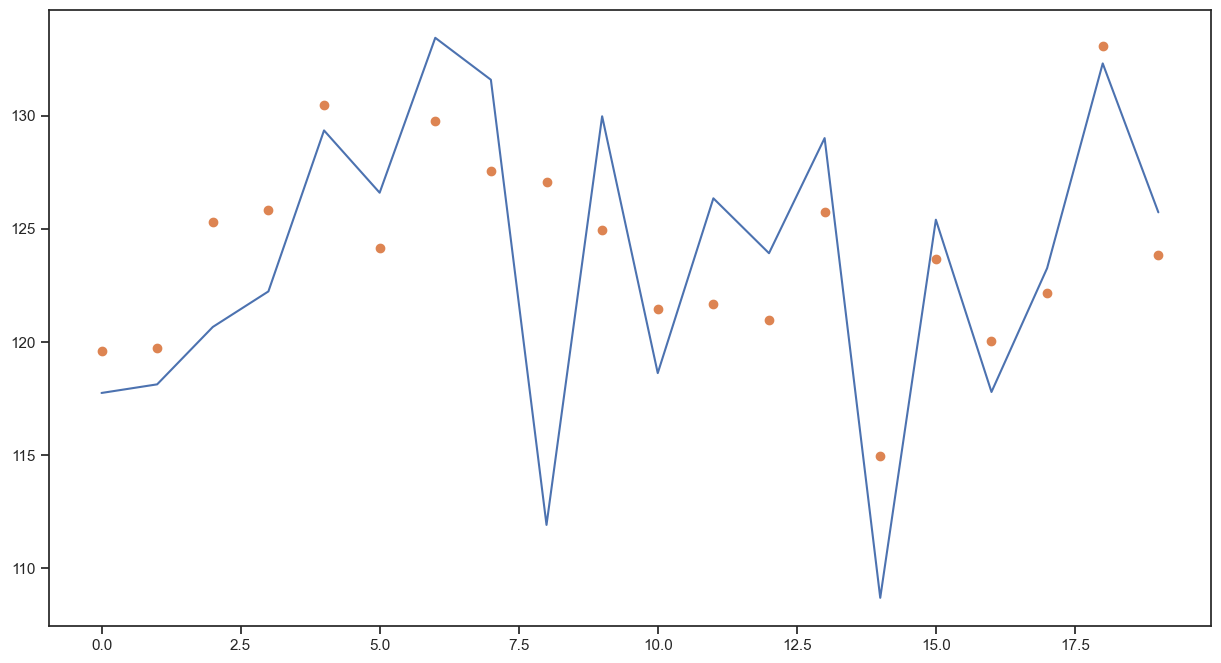

In [93]:
plot_20(y_test, y_preds)

**other regression models: Lasso**

In [78]:
from sklearn.linear_model import Lasso

In [83]:
mse = list()
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_preds = lasso.predict(X_test)
    error = round(mean_squared_error(y_test, y_preds),3)
    mse.append(error)

alpha_error = pd.DataFrame({'mse': mse, 'alpha': alphas})

In [84]:
alpha_error

,mse,alpha
0,25.285,0.010
1,25.487,0.011
2,25.558,0.012
3,25.560,0.013
4,25.561,0.014
...,...,...
86,26.685,0.096
87,26.711,0.097
88,26.737,0.098
89,26.763,0.099


In [85]:
alpha_error[alpha_error['mse'] == alpha_error['mse'].min()]

,mse,alpha
0,25.285,0.01


In [90]:
lasso = Lasso(alpha=0.03)
lasso.fit(X_train, y_train)
y_preds = lasso.predict(X_test)
error = round(mean_squared_error(y_test, y_preds),3)
print(error)

25.627


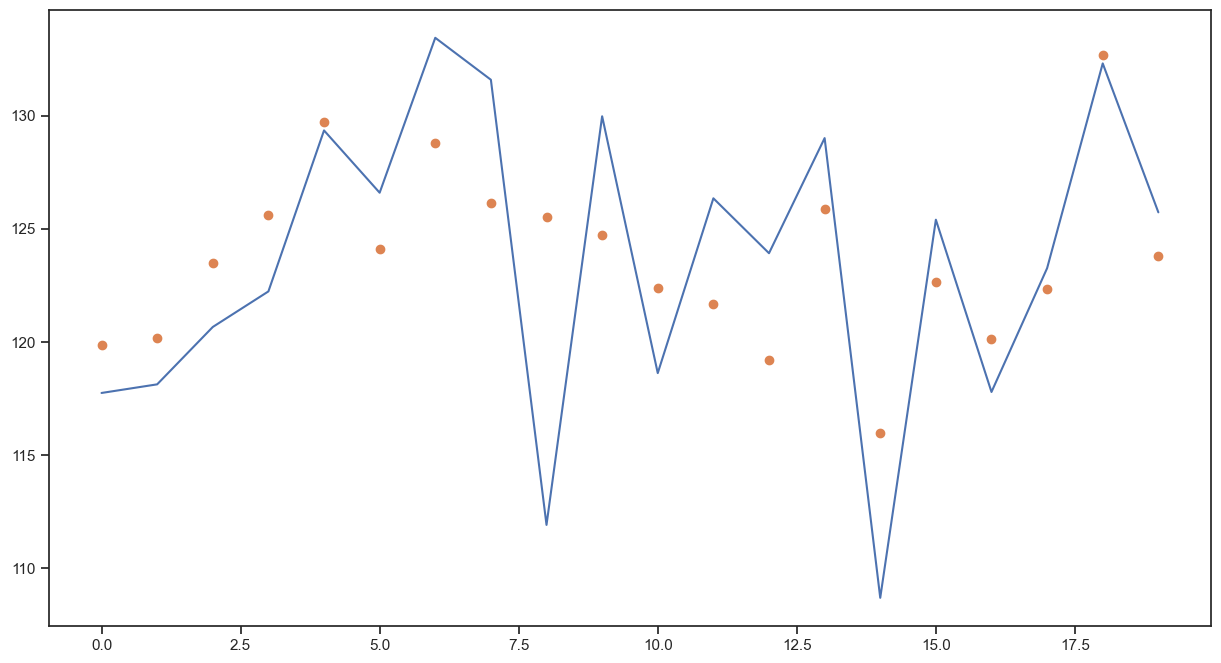

In [91]:
plot_20(y_test, y_preds)